## Display Training Curve

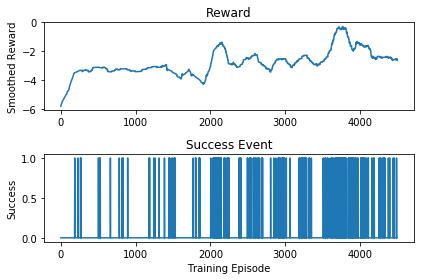

In [19]:
import numpy as np
from matplotlib import pyplot as plt
reward = np.load('reward_log.npy')

def smooth(y, radius=100, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]
    
success_list=np.zeros(len(reward))
success_list[np.where(reward>-0)]=1  # reward larger than 0 indicates successful grasping

early_stop=4500

fig, axs = plt.subplots(2)
# fig.suptitle('Training')
# plot smoothed reward curve
axs[0].plot(smooth(reward[:early_stop], radius=100))
axs[0].set_title('Reward')
axs[0].set_ylabel('Smoothed Reward')
# plot the success event, as 1, otherwise 0
axs[1].plot(success_list[:early_stop])
axs[1].set_title('Success Event')
axs[1].set_xlabel('Training Episode')
axs[1].set_ylabel('Success')
plt.tight_layout()
plt.savefig('training.pdf')
plt.show()


In [26]:
a=np.array([1,2,3,4,5,6])
print(a.shape[0])
np.random.normal(0, 0.1,2)

6


array([-0.12796665, -0.02150392])